# Explore here

First, load the data

In [37]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/4GeeksAcademy/alternative-time-series-project/main/sales.csv')
df

,date,sales
0,2022-09-03 17:10:08.079328,55.292157
1,2022-09-04 17:10:08.079328,53.803211
2,2022-09-05 17:10:08.079328,58.141693
3,2022-09-06 17:10:08.079328,64.530899
4,2022-09-07 17:10:08.079328,66.013633
...,...,...
361,2023-08-30 17:10:08.079328,989.600354
362,2023-08-31 17:10:08.079328,994.987326
363,2023-09-01 17:10:08.079328,995.814415
364,2023-09-02 17:10:08.079328,997.350214


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    366 non-null    object 
 1   sales   366 non-null    float64
dtypes: float64(1), object(1)
memory usage: 5.8+ KB


I am going to get delete the time because they all seem to be the same

In [39]:
df['date'] = pd.to_datetime(df['date']).dt.date
df


,date,sales
0,2022-09-03,55.292157
1,2022-09-04,53.803211
2,2022-09-05,58.141693
3,2022-09-06,64.530899
4,2022-09-07,66.013633
...,...,...
361,2023-08-30,989.600354
362,2023-08-31,994.987326
363,2023-09-01,995.814415
364,2023-09-02,997.350214


In [40]:
df = df.set_index("date")
series = df["sales"]
series

date
2022-09-03      55.292157
2022-09-04      53.803211
2022-09-05      58.141693
2022-09-06      64.530899
2022-09-07      66.013633
                 ...     
2023-08-30     989.600354
2023-08-31     994.987326
2023-09-01     995.814415
2023-09-02     997.350214
2023-09-03    1000.482785
Name: sales, Length: 366, dtype: float64

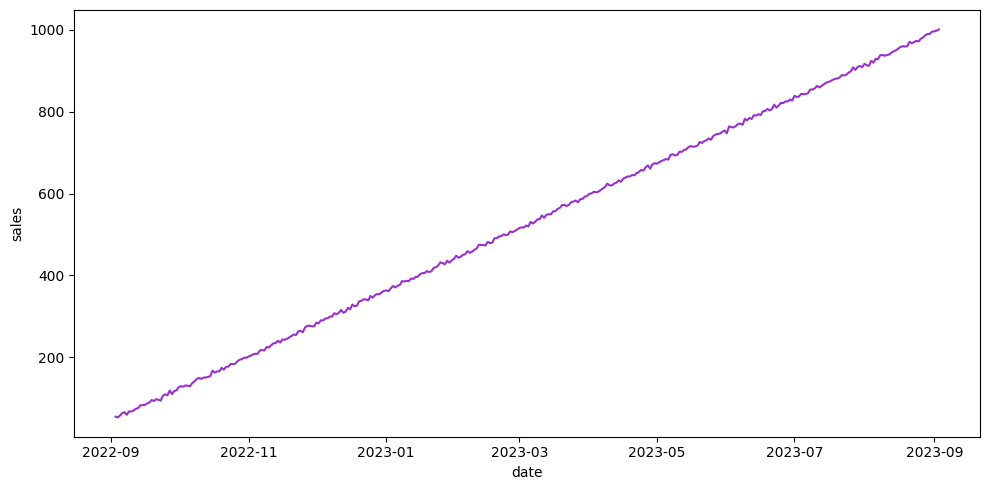

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = series, color= 'darkorchid')

plt.tight_layout()

plt.show()

Now we analyse the time series:

Trend: upward 'still' 

Seasonality: None

Variasbility: None 

Outliers: not apparently

Inflection Points: none

Decomposition of the series:

In [44]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(series, period = 12)
decomposition

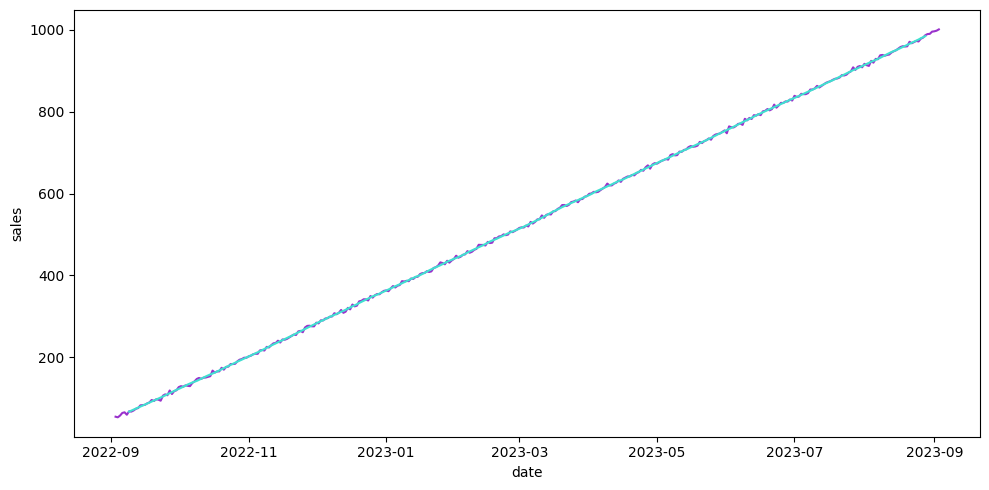

In [48]:
trend = decomposition.trend

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = series, color= 'darkorchid')
sns.lineplot(data = trend, color= 'turquoise')

plt.tight_layout()

plt.show()

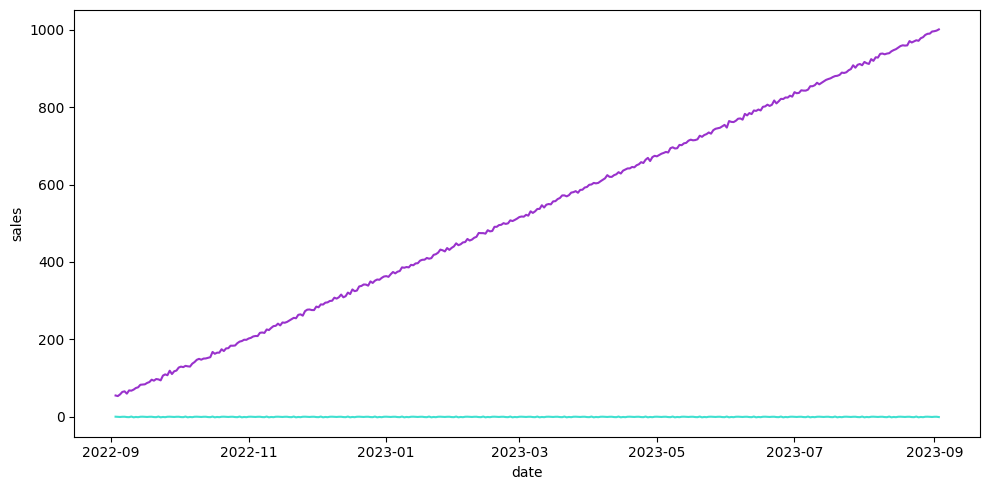

In [49]:
seasonal = decomposition.seasonal

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = series, color= 'darkorchid')
sns.lineplot(data = seasonal, color= 'turquoise')

plt.tight_layout()

plt.show()

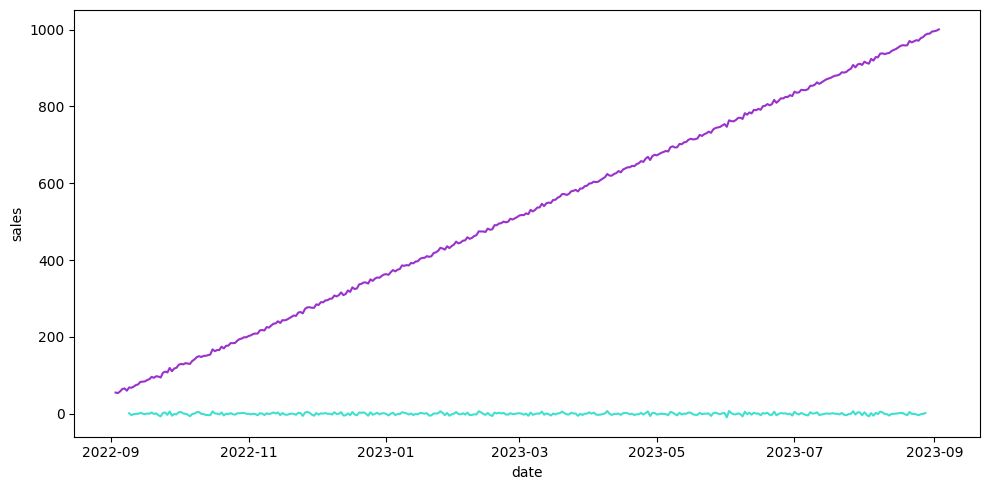

In [50]:
residual = decomposition.resid

fig, axis = plt.subplots(figsize = (10, 5))

sns.lineplot(data = series, color= 'darkorchid')
sns.lineplot(data = residual, color= 'turquoise')


plt.tight_layout()

plt.show()